In [ ]:
Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1JO-jJC96np08BpJbNna76q_rNP2VBdLz'}) # replace the id with id of file you want to access
downloaded.GetContentFile('drivers.csv')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, FunctionTransformer, Imputer
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.backend import clear_session
from bs4 import BeautifulSoup

%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
Couldn't import dot_parser, loading of dot files will not be possible.


## Webscrape season totals of all players and begin plotting

In [2]:
res = requests.get('https://www.basketball-reference.com/leagues/NBA_2018_totals.html')

In [3]:
soup = BeautifulSoup(res.content, 'lxml')

In [13]:
all_player_stats = []

table = soup.find('table', {'id': 'totals_stats'})

rows = table.find('tbody').find_all('tr')

for player_row in rows:
    player = {}
    
    if player_row.find('a'):
        player['Name'] = player_row.find('a').text
    if player_row.find('td'):
        player['Pos'] = player_row.find('td', {'class': 'center'}).text
    if player_row.find('td'):
        player['Age'] = player_row.find('td', {'class': 'right'}).text
    if player_row.find('td'):
        player['Team'] = player_row.find('td', {'data-stat':'team_id'}).text
    if player_row.find('td'):
        player['Games'] = player_row.find('td', {'data-stat': 'g'}).text
    if player_row.find('td'):
        player['Starts'] = player_row.find('td', {'data-stat': 'gs'}).text
    if player_row.find('td'):
        player['MPG'] = player_row.find('td', {'data-stat': 'mp'}).text
    if player_row.find('td'):
        player['FG'] = player_row.find('td', {'data-stat': 'fg'}).text
    if player_row.find('td'):
        player['FGA'] = player_row.find('td', {'data-stat': 'fga'}).text
    if player_row.find('td'):
         player['FG%'] = player_row.find('td', {'data-stat': 'fg_pct'}).text
    if player_row.find('td'):
        player['3FG'] = player_row.find('td', {'data-stat': 'fg3'}).text
    if player_row.find('td'):
        player['3FGA'] = player_row.find('td', {'data-stat': 'fg3a'}).text    
    if player_row.find('td'):
        player['FG3%'] = player_row.find('td', {'data-stat': 'fg3_pct'}).text
    if player_row.find('td'):
        player['2P'] = player_row.find('td', {'data-stat': 'fg2'}).text    
    if player_row.find('td'):
        player['2PA'] = player_row.find('td', {'data-stat': 'fg2a'}).text
    if player_row.find('td'):
        player['2P%'] = player_row.find('td', {'data-stat': 'fg2_pct'}).text    
    if player_row.find('td'):
        player['eFG%'] = player_row.find('td', {'data-stat': 'efg_pct'}).text
    if player_row.find('td'):
        player['FT'] = player_row.find('td', {'data-stat': 'ft'}).text    
    if player_row.find('td'):
        player['FTA'] = player_row.find('td', {'data-stat': 'fta'}).text
    if player_row.find('td'):
        player['FT%'] = player_row.find('td', {'data-stat': 'ft_pct'}).text    
    if player_row.find('td'):
        player['ORB'] = player_row.find('td', {'data-stat': 'orb'}).text
    if player_row.find('td'):
        player['DRB'] = player_row.find('td', {'data-stat': 'drb'}).text    
    if player_row.find('td'):
        player['TRB'] = player_row.find('td', {'data-stat': 'trb'}).text    
    if player_row.find('td'):
        player['AST'] = player_row.find('td', {'data-stat': 'ast'}).text    
    if player_row.find('td'):
        player['STL'] = player_row.find('td', {'data-stat': 'stl'}).text    
    if player_row.find('td'):
        player['BLK'] = player_row.find('td', {'data-stat': 'blk'}).text    
    if player_row.find('td'):
        player['TOV'] = player_row.find('td', {'data-stat': 'tov'}).text    
    if player_row.find('td'):
        player['PF'] = player_row.find('td', {'data-stat': 'pf'}).text    
    if player_row.find('td'):
        player['PTS'] = player_row.find('td', {'data-stat': 'pts'}).text    
               
   
    all_player_stats.append(player)
player_stats = pd.DataFrame(all_player_stats)

#### remove header columns from website

In [14]:
player_stats.head()

,2P,2P%,2PA,3FG,3FGA,AST,Age,BLK,DRB,FG,...,ORB,PF,PTS,Pos,STL,Starts,TOV,TRB,Team,eFG%
0,30,.435,69,83,213,27,24,8,84,113,...,24,120,344,SG,36,8,25,108,OKC,.548
1,25,.362,69,93,272,55,27,27,206,118,...,38,141,377,PF,30,8,59,244,BRK,.482
2,431,.629,685,0,2,84,24,77,289,431,...,378,210,1013,C,89,73,124,667,OKC,.627
3,169,.518,326,0,7,100,20,40,258,169,...,115,136,461,C,32,19,66,373,MIA,.508
4,35,.393,89,25,66,29,32,9,62,60,...,4,54,167,SG,4,3,21,66,ORL,.468


In [15]:
player_stats.dropna(inplace= True)

#### Create Columns with only strings

In [19]:
new_totals_col = player_stats.columns[~player_stats.columns.isin(['Name', 'Team', 'Pos'])]

#### convert objects --> strings


In [20]:
graph_totals = player_stats[new_totals_col].apply(pd.to_numeric)

#### Grab players who have started 5 games

In [38]:
Player_totals = graph_totals[graph_totals['Starts'] > 5]

In [39]:
Player_totals.shape

(318, 26)

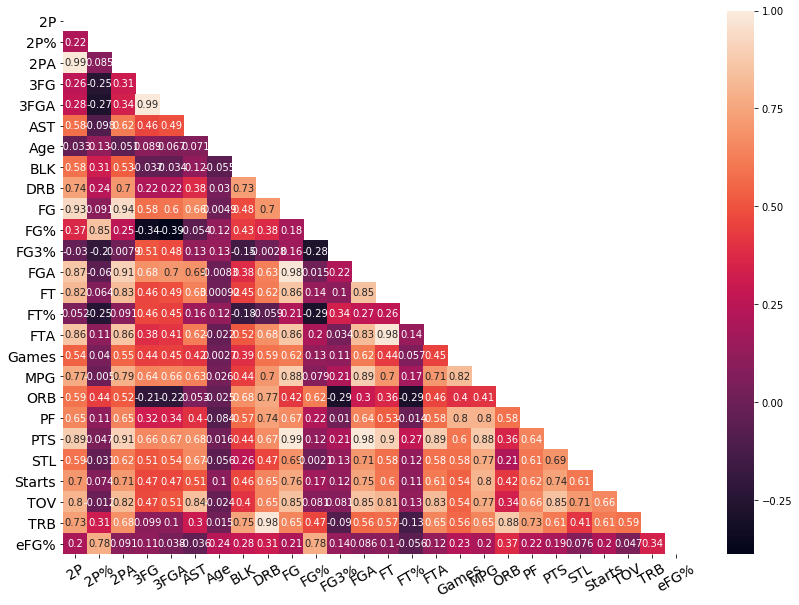

In [40]:
def correlation_heat_map(df):
   corrs = df.corr()

   # Set the default matplotlib figure size:
   fig, ax = plt.subplots(figsize=(14,10
                                  ))

   # Generate a mask for the upper triangle (taken from seaborn example gallery)
   mask = np.zeros_like(corrs, dtype=np.bool)
   mask[np.triu_indices_from(mask)] = True

   # Plot the heatmap with seaborn.
   # Assign the matplotlib axis the function returns. This will let us resize the labels.
   ax = sns.heatmap(corrs, mask=mask, annot=True)

   # Resize the labels.
   ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
   ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

   # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
   plt.show()
   
correlation_heat_map(Player_totals)

In [41]:
# fig, ax = plt.subplots(figsize=(14,10))
# sns.distplot(LBJ['PTS_x'])
# plt.title("Distribution of LBJ Pts/Game");

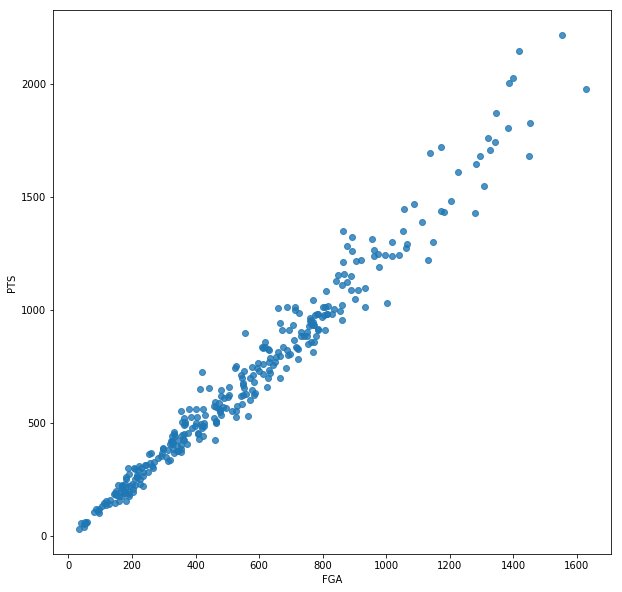

In [42]:
fig, ax = plt.subplots(figsize=(10,10
                               ))


ax = sns.regplot(x="FGA", y="PTS", data=Player_totals, fit_reg=False)

plt.show;

In [43]:
totals['PTS'] = pd.to_numeric(totals['PTS'])

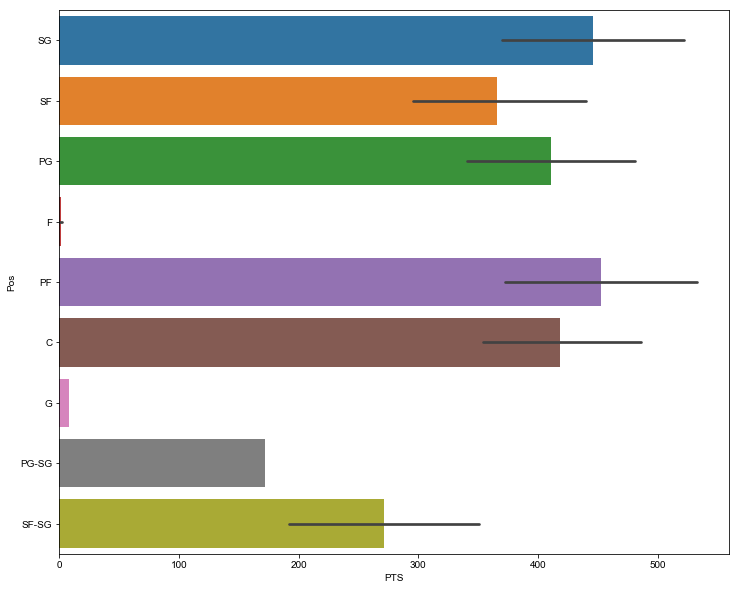

In [44]:
fig, ax = plt.subplots(figsize=(12,10
                               ))
sns.set_style("whitegrid")


ax = sns.barplot(x="PTS", y="Pos", data=totals.sort_values('PTS', ascending=True))
plt.show;

## Import Datasets

In [45]:
dateparse1 = lambda dates: pd.datetime.strptime(dates, '%m/%d/%y')
dateparse2 = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')

data1 = pd.read_csv('team_stats_season_long.csv', parse_dates=['DATE'], index_col=['DATE'], date_parser=dateparse1)
data2 = pd.read_csv('season-player-feed.csv', parse_dates=['DATE'], index_col=['DATE'], date_parser=dateparse2)
data1.reset_index(inplace=True)
data2.reset_index(inplace=True)


In [46]:
data1.columns

Index(['DATE', 'DATASET', 'TEAMS', 'VENUE', 'PTS', 'POSS', 'PACE', 'OEFF',
       'DEFF', 'REST DAYS', 'OPENING ODDS', 'OPENING SPREAD', 'OPENING TOTAL',
       'MOVEMENTS', 'CLOSING ODDS', 'MONEYLINE', 'HALFTIME'],
      dtype='object')

In [47]:
data2.columns

Index(['DATE', 'DATA SET', 'PLAYER FULL NAME', 'POSITION', 'OWN TEAM',
       'OPP TEAM', 'VENUE (R/H)', 'MIN', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA',
       'OR', 'DR', 'TOT', 'A', 'PF', 'ST', 'TO', 'BL', 'PTS'],
      dtype='object')

### Shift Player Statistics one game allowing for current game data to be past data

In [48]:
Player_stats = pd.DataFrame()
for i in data2['PLAYER FULL NAME'].unique():
    temp1 = data2[data2['PLAYER FULL NAME'] == i]
    temp2 = temp1[['VENUE (R/H)', 'MIN', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA',
       'OR', 'DR', 'TOT', 'A', 'PF', 'ST', 'TO', 'BL', 'PTS']]
    temp2 = temp2.shift(1)
    temp1 = temp1[['DATE', 'DATA SET', 'PLAYER FULL NAME', 'POSITION', 'OWN TEAM',
       'OPP TEAM']]
    temp1 = pd.concat([temp1, temp2], axis=1)
#     temp1 = temp1[1:]
    Player_stats = pd.concat([Player_stats, temp1], axis=0)

In [49]:
Player_stats.columns

Index(['DATE', 'DATA SET', 'PLAYER FULL NAME', 'POSITION', 'OWN TEAM',
       'OPP TEAM', 'VENUE (R/H)', 'MIN', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA',
       'OR', 'DR', 'TOT', 'A', 'PF', 'ST', 'TO', 'BL', 'PTS'],
      dtype='object')

In [50]:
Player_stats.shape

(24773, 23)

In [51]:
Player_stats.head()

,DATE,DATA SET,PLAYER FULL NAME,POSITION,OWN TEAM,OPP TEAM,VENUE (R/H),MIN,FG,FGA,...,FTA,OR,DR,TOT,A,PF,ST,TO,BL,PTS
0,2017-10-17,2017-2018 Regular Season,Gordon Hayward,SF,Boston,Cleveland,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-10-17,2017-2018 Regular Season,Jayson Tatum,SF,Boston,Cleveland,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,2017-10-18,2017-2018 Regular Season,Jayson Tatum,SF,Boston,Milwaukee,R,36.5,5.0,12.0,...,3.0,4.0,6.0,10.0,3.0,4.0,0.0,1.0,0.0,14.0
390,2017-10-20,2017-2018 Regular Season,Jayson Tatum,SF,Boston,Philadelphia,H,36.5,3.0,7.0,...,5.0,2.0,7.0,9.0,2.0,3.0,1.0,2.0,0.0,8.0
1096,2017-10-24,2017-2018 Regular Season,Jayson Tatum,SF,Boston,New York,R,32.8,3.0,8.0,...,9.0,2.0,6.0,8.0,0.0,3.0,0.0,3.0,3.0,15.0


## Shift team defensive statistics one game 

In [52]:
defensive = pd.DataFrame()
for i in data1['TEAMS'].unique():
    temp1 = data1[data1['TEAMS'] == i]
    temp1 = temp1.shift(1)
    temp1['DATE'] = temp1['DATE'].shift(-1)
#     temp1 = temp1[1:]
    defensive = pd.concat([defensive, temp1], axis=0)

## Shift team offensive statistics one game 

In [53]:
offensive = pd.DataFrame()
for i in data1['TEAMS'].unique():
    temp1 = data1[data1['TEAMS'] == i]
    temp1 = temp1.shift(1)
    temp1['DATE'] = temp1['DATE'].shift(-1)
#     temp1 = temp1[1:]
    offensive = pd.concat([offensive, temp1], axis=0)

### Check to see offensive/defensive teams shifted

In [54]:
offensive[offensive['TEAMS'] == 'Boston'].head(2)

,DATE,DATASET,TEAMS,VENUE,PTS,POSS,PACE,OEFF,DEFF,REST DAYS,OPENING ODDS,OPENING SPREAD,OPENING TOTAL,MOVEMENTS,CLOSING ODDS,MONEYLINE,HALFTIME
13,2017-10-18,2017-2018 Regular Season,Boston,Road,99.0,100.3,100.3,98.7,101.7,3+,214.5,4.0,214.5,215 / 215.5 / 215.5o15,216.0,166.0,110
36,2017-10-20,2017-2018 Regular Season,Boston,Home,100.0,99.4,99.4,100.6,108.7,B2B,-6.0,-6.0,208.5,-5,-1.0,-120.0,-2


In [55]:
defensive[defensive['TEAMS'] == 'Milwaukee'].head(2)

,DATE,DATASET,TEAMS,VENUE,PTS,POSS,PACE,OEFF,DEFF,REST DAYS,OPENING ODDS,OPENING SPREAD,OPENING TOTAL,MOVEMENTS,CLOSING ODDS,MONEYLINE,HALFTIME
41,2017-10-20,2017-2018 Regular Season,Milwaukee,Road,108.0,99.4,99.4,108.7,100.6,3+,208.5,6.0,208.5,208.5 / 207 / 204,203.0,100.0,101.5
67,2017-10-21,2017-2018 Regular Season,Milwaukee,Home,97.0,93.7,93.7,103.6,123.8,1,210.0,1.5,210.0,-14,-1.5,-122.0,-2 EVEN


## Merge Team Offensive data to Player stats 

In [56]:
df = pd.merge(Player_stats, offensive, how='left', left_on=['DATE', 'OWN TEAM'], right_on=['DATE', 'TEAMS'])

In [57]:
df[df['TEAMS'] == 'Milwaukee'].head(2)

,DATE,DATA SET,PLAYER FULL NAME,POSITION,OWN TEAM,OPP TEAM,VENUE (R/H),MIN,FG,FGA,...,OEFF,DEFF,REST DAYS,OPENING ODDS,OPENING SPREAD,OPENING TOTAL,MOVEMENTS,CLOSING ODDS,MONEYLINE,HALFTIME
7192,2017-10-20,2017-2018 Regular Season,Giannis Antetokounmpo,PF,Milwaukee,Cleveland,R,36.9,13.0,22.0,...,108.7,100.6,3+,208.5,6.0,208.5,208.5 / 207 / 204,203.0,100.0,101.5
7193,2017-10-21,2017-2018 Regular Season,Giannis Antetokounmpo,PF,Milwaukee,Portland,H,38.5,15.0,22.0,...,103.6,123.8,1,210.0,1.5,210.0,-14,-1.5,-122.0,-2 EVEN


### Naming convention for defensive team data

In [58]:
defensive.columns = [col + ' DEF' for col in defensive.columns]


## Merge Team Defensive data to Player Stat + Offensive

In [59]:
df = pd.merge(df, defensive, how='left', left_on=['DATE', 'OPP TEAM'], right_on=['DATE DEF', 'TEAMS DEF'])

In [60]:
df.shape

(24773, 56)

In [61]:
df.head(2)

,DATE,DATA SET,PLAYER FULL NAME,POSITION,OWN TEAM,OPP TEAM,VENUE (R/H),MIN,FG,FGA,...,OEFF DEF,DEFF DEF,REST DAYS DEF,OPENING ODDS DEF,OPENING SPREAD DEF,OPENING TOTAL DEF,MOVEMENTS DEF,CLOSING ODDS DEF,MONEYLINE DEF,HALFTIME DEF
0,2017-10-17,2017-2018 Regular Season,Gordon Hayward,SF,Boston,Cleveland,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-10-17,2017-2018 Regular Season,Jayson Tatum,SF,Boston,Cleveland,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Adjust date format for later

In [62]:
df['DATE'] = df['DATE'].dt.strftime('%m/%d/%Y')
df['DATE DEF'] = df['DATE DEF'].dt.strftime('%m/%d/%Y')

In [63]:
df.head(2)

,DATE,DATA SET,PLAYER FULL NAME,POSITION,OWN TEAM,OPP TEAM,VENUE (R/H),MIN,FG,FGA,...,OEFF DEF,DEFF DEF,REST DAYS DEF,OPENING ODDS DEF,OPENING SPREAD DEF,OPENING TOTAL DEF,MOVEMENTS DEF,CLOSING ODDS DEF,MONEYLINE DEF,HALFTIME DEF
0,10/17/2017,2017-2018 Regular Season,Gordon Hayward,SF,Boston,Cleveland,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/17/2017,2017-2018 Regular Season,Jayson Tatum,SF,Boston,Cleveland,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Create Rolling statistical averages of 3-days, 5-days, & 10-days

In [64]:
ten_game_mean = pd.DataFrame()
five_game_mean = pd.DataFrame()
three_game_mean = pd.DataFrame()

for i in df['PLAYER FULL NAME'].unique():
    temp = df[df['PLAYER FULL NAME'] == i]

    temp1 = temp.rolling(10).mean().shift(1)
    ten_game_mean = pd.concat([ten_game_mean, temp1], axis=0)

    temp2 = temp.rolling(5).mean().shift(1)
    five_game_mean = pd.concat([five_game_mean, temp2], axis=0)
    
    temp3 = temp.rolling(3).mean().shift(1)
    three_game_mean = pd.concat([three_game_mean, temp3], axis=0)

ten_game_mean.columns = [col + ' 10-day mean' for col in df.columns]
five_game_mean.columns = [col + ' 5-day mean' for col in df.columns]
three_game_mean.columns = [col + ' 3-day mean' for col in df.columns]
new_df = pd.concat([df, ten_game_mean, five_game_mean, three_game_mean], axis=1)
new_df.head(2)

,DATE,DATA SET,PLAYER FULL NAME,POSITION,OWN TEAM,OPP TEAM,VENUE (R/H),MIN,FG,FGA,...,OEFF DEF 3-day mean,DEFF DEF 3-day mean,REST DAYS DEF 3-day mean,OPENING ODDS DEF 3-day mean,OPENING SPREAD DEF 3-day mean,OPENING TOTAL DEF 3-day mean,MOVEMENTS DEF 3-day mean,CLOSING ODDS DEF 3-day mean,MONEYLINE DEF 3-day mean,HALFTIME DEF 3-day mean
0,10/17/2017,2017-2018 Regular Season,Gordon Hayward,SF,Boston,Cleveland,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/17/2017,2017-2018 Regular Season,Jayson Tatum,SF,Boston,Cleveland,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
new_df.shape

(24773, 224)

## Use single player for Linear Regression - Lebron James(LBJ)

In [66]:
LBJ = new_df.loc[new_df['PLAYER FULL NAME'] == 'LeBron James'].copy()

In [74]:
#LBJ

In [75]:
LBJ.head(2)

,DATE,DATA SET,PLAYER FULL NAME,POSITION,OWN TEAM,OPP TEAM,VENUE (R/H),MIN,FG,FGA,...,OEFF DEF 3-day mean,DEFF DEF 3-day mean,REST DAYS DEF 3-day mean,OPENING ODDS DEF 3-day mean,OPENING SPREAD DEF 3-day mean,OPENING TOTAL DEF 3-day mean,MOVEMENTS DEF 3-day mean,CLOSING ODDS DEF 3-day mean,MONEYLINE DEF 3-day mean,HALFTIME DEF 3-day mean
608,11/09/2017,2017-2018 Regular Season,LeBron James,SF,Cleveland,Houston,H,36.7,10.0,20.0,...,108.200000,118.4,3IN4,134.166667,-1.166667,214.0,203.5 / 204 / 204o11,135.833333,-159.000000,99.5
609,11/11/2017,2017-2018 Regular Season,LeBron James,SF,Cleveland,Dallas,R,40.0,15.0,24.0,...,112.833333,112.3,1,136.500000,1.166667,205.5,-11.85502959,137.500000,-5.666667,2.5


#### Understand what statistics correlate to points scored

In [69]:
# abs(LBJ.corr()['PTS_x']).sort_values(ascending=False)

In [70]:
#list(LBJ.columns.values)

### Drop null values

In [71]:
LBJ.dropna(inplace=True)

In [660]:
LBJ.shape

(60, 224)

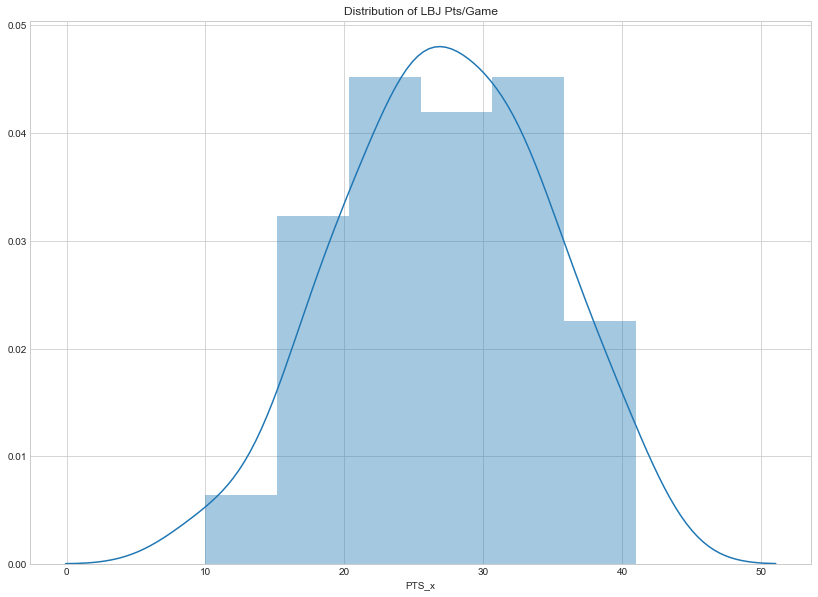

In [72]:
fig, ax = plt.subplots(figsize=(14,10))
sns.distplot(LBJ['PTS_x'])
plt.title("Distribution of LBJ Pts/Game");

In [76]:
features_LBJ = list(LBJ.describe().columns)

In [77]:
features = [ 'PTS_x 3-day mean', 'DR 5-day mean', 'PTS_x 10-day mean', 'FGA 5-day mean'  ]
# 'PF', 'ST', 'TO', 'BL'

In [78]:
X = LBJ[features]
y = LBJ['PTS_x']
y = y.shift(1)
X = X[1:]
y.dropna(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 9)

In [79]:
ss = StandardScaler()
#lasso = Lasso(max_iter=70000)
lr = LinearRegression()
pipe = Pipeline([
#    ('poly', poly),     #transformer
    ('ss', ss),         #transformer
#    ('lasso', lasso)
    ('lr', lr)])

In [80]:
params = {
#  'lasso__alpha': np.arange(.001,.15, .0025)
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.2712488981725893


/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


{}

In [81]:
gs.score(X_test, y_test)

0.22107346709731768

In [82]:
mean_squared_error(y_test, gs.predict(X_test))

52.32309163684952

In [83]:
new_df.dropna(inplace=True)

In [84]:
new_df.shape

(17218, 224)

In [85]:
# features = [ 'PTS_x 3-day mean', 'DR 5-day mean', 'PTS_x 10-day mean', 'FGA 5-day mean'  ]
features2 = list(new_df.describe().columns)
# 'PF', 'ST', 'TO', 'BL'
X = new_df[features2]
y = new_df['PTS_x']
y = y.shift(1)
X = X[1:]
y.dropna(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 9)

# Neural Network Setup

### Scaling all the data

In [86]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

y_train_sc = ss.fit_transform(y_train)
y_test_sc = ss.transform(y_test)

X_train_sc2 = np.reshape(X_train_sc, (X_train_sc.shape[0], 1, X_train_sc.shape[1]))
X_test_sc2 = np.reshape(X_test_sc, (X_test_sc.shape[0], 1, X_test_sc.shape[1]))

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.re

#### Find imput shape for nural net

In [87]:
X_train_sc2.shape

(12912, 1, 144)

In [88]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, 144), return_sequences=True))
model.add(Dropout(.5))
model.add(LSTM(5))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
# hidden layers = Number of layers between imputs and targets

history = model.fit(X_train_sc2, y_train_sc, validation_data=(X_test_sc2, y_test_sc), epochs=5, shuffle=False, verbose=2)

Train on 12912 samples, validate on 4305 samples
Epoch 1/5
 - 5s - loss: 0.4883 - val_loss: 0.3877
Epoch 2/5
 - 2s - loss: 0.3910 - val_loss: 0.3716
Epoch 3/5
 - 2s - loss: 0.3740 - val_loss: 0.3661
Epoch 4/5
 - 2s - loss: 0.3668 - val_loss: 0.3640
Epoch 5/5
 - 2s - loss: 0.3584 - val_loss: 0.3637


NBA games occur as time series shuffle=False

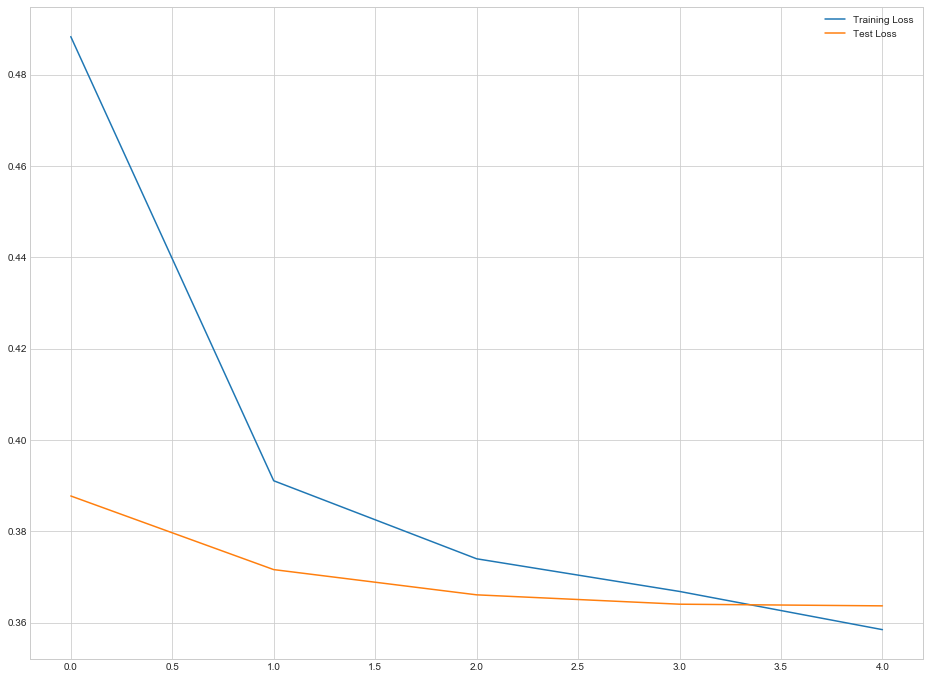

In [89]:
plt.figure(figsize=(16, 12))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

When test loss starts growing it begins over fitting -  meaning it looks good with training data but not with test  

# Mean Squared Error

In [90]:
mean_squared_error(y_test, ss.inverse_transform(model.predict(X_test_sc2)))

23.337581812669303

In [91]:
np.sqrt(mean_squared_error(y_test, ss.inverse_transform(model.predict(X_test_sc2))))

4.830898654771108

In [92]:
#precision recall wiki

In [677]:
#long term, short term memory

hidden layers = 2
scaled all data
50nodes
on each iteration 50% of nodes arent dropped to the next layer
second layer I hav 5 nodes
activation linear because using linear regression
compile the model to minimize the mean squared error
then model is fit
real error = 4.84

can grasp relations between data in a seris